In [1]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [2]:
df = pd.read_excel('Contraceptive_method_dataset.xlsx')

In [3]:
df.head(5)

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [4]:
df.tail(5)

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


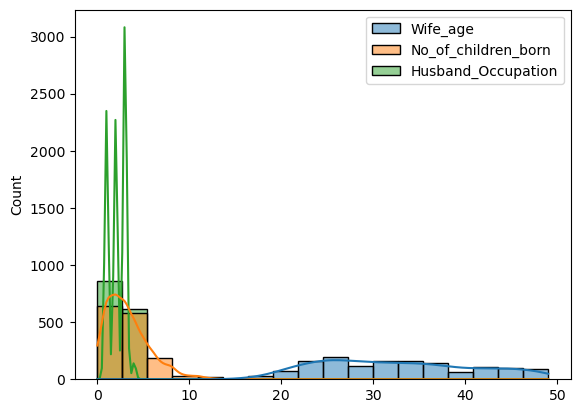

In [6]:
sns.histplot(data=df,kde=True);

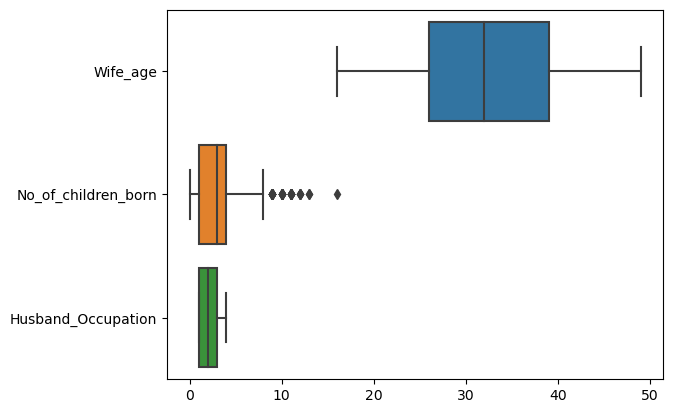

In [7]:
sns.boxplot(data=df, orient='h');


In [8]:
df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [9]:
df.duplicated().sum()

80

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
cols = ['Wife_age','No_of_children_born']

for column in cols:
    print(column)
    median_1 = df[column].mode()[0]
    print(median_1)
    df[column].fillna(value=median_1,inplace=True)
    
df.isnull().sum()

Wife_age
25.0
No_of_children_born
2.0


Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

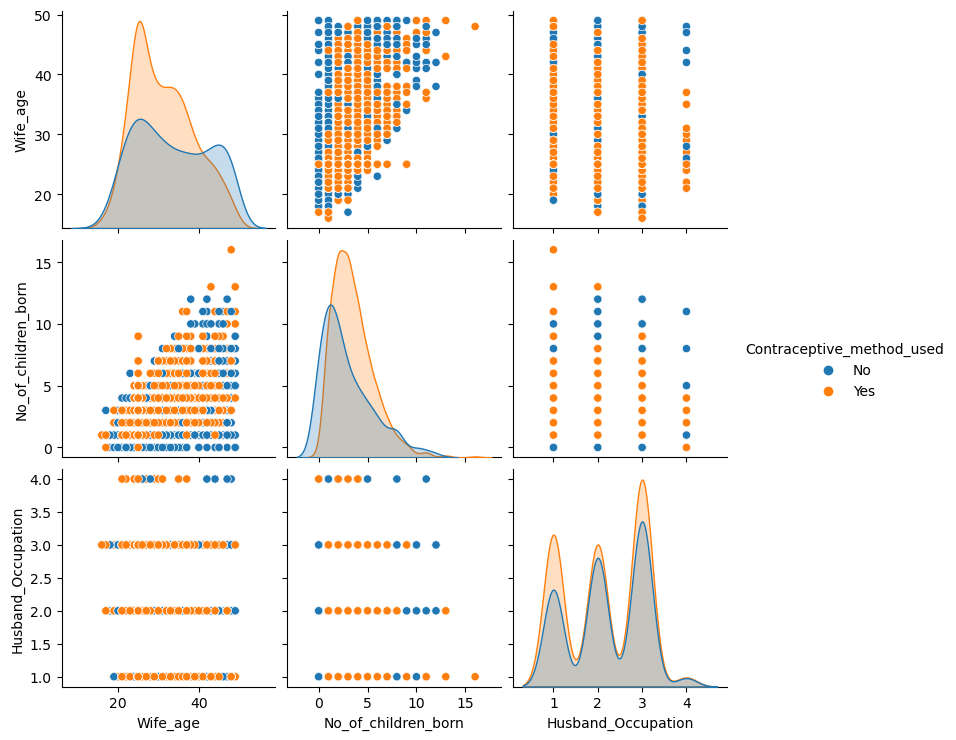

In [13]:
sns.pairplot(df,diag_kind='kde',hue='Contraceptive_method_used');

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.7+ KB


In [15]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [16]:
lr,ur=remove_outlier(df['No_of_children_born'])
print("lower range",lr, "and upper range", ur)

lower range -5.0 and upper range 11.0


In [17]:
df['No_of_children_born']=np.where(df['No_of_children_born']>ur,ur,df['No_of_children_born'])
df['No_of_children_born']=np.where(df['No_of_children_born']<lr,lr,df['No_of_children_born'])

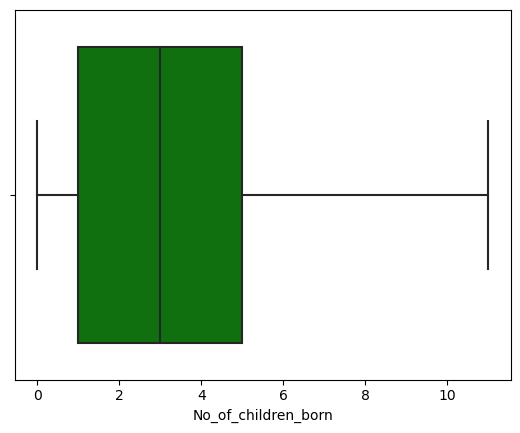

In [18]:
sns.boxplot(data=df,x='No_of_children_born',color='Green');

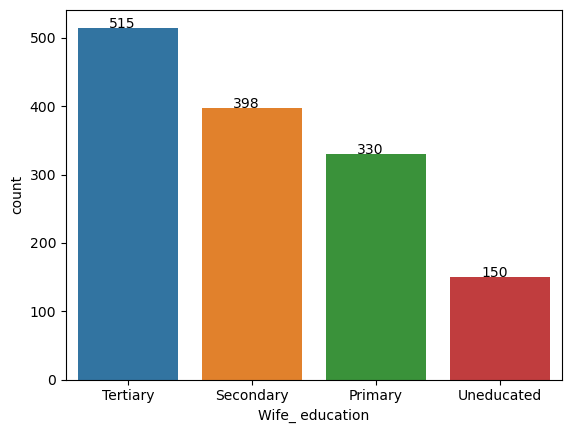

In [19]:
ax = sns.countplot(x="Wife_ education", data=df,  order = df['Wife_ education'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

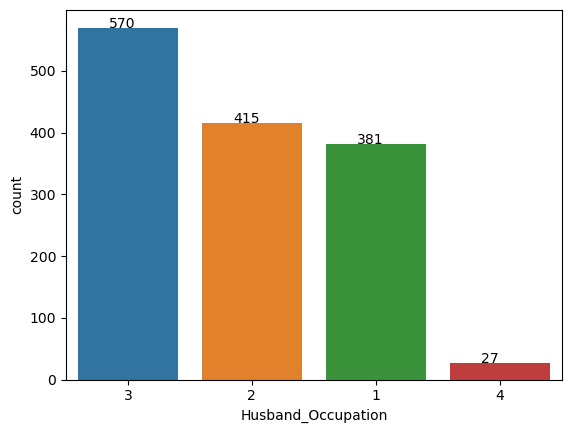

In [20]:
ax = sns.countplot(x="Husband_Occupation", data=df,  order = df['Husband_Occupation'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

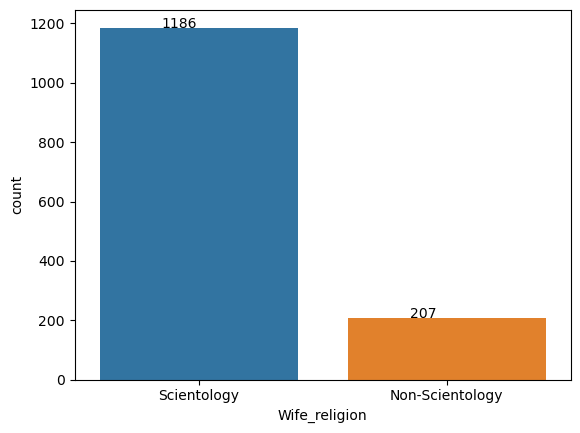

In [21]:
ax = sns.countplot(x="Wife_religion", data=df,  order = df['Wife_religion'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

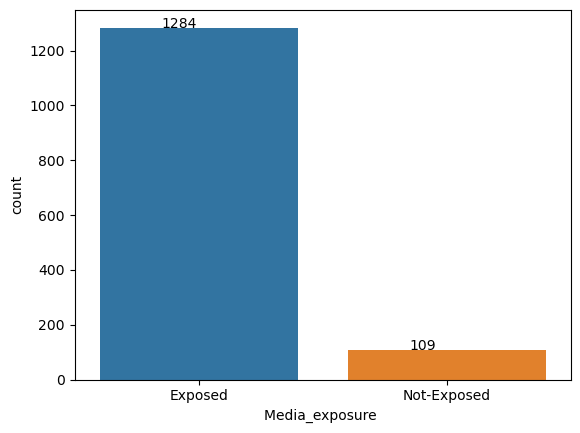

In [22]:
ax = sns.countplot(x='Media_exposure ', data=df,  order = df['Media_exposure '].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

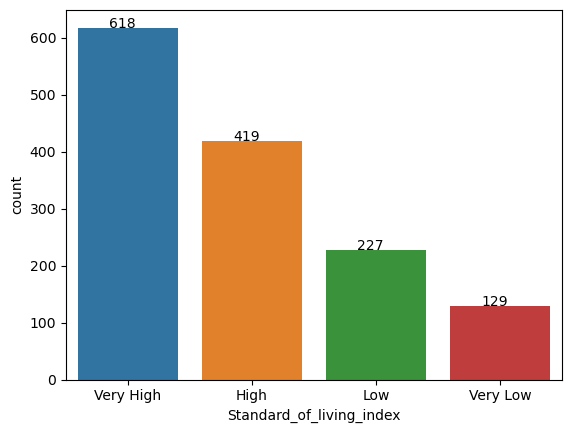

In [23]:
ax = sns.countplot(x="Standard_of_living_index", data=df,  order = df['Standard_of_living_index'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

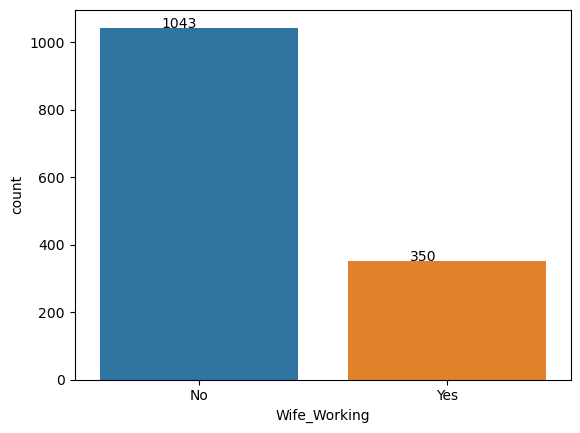

In [24]:
ax = sns.countplot(x="Wife_Working", data=df,  order = df['Wife_Working'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

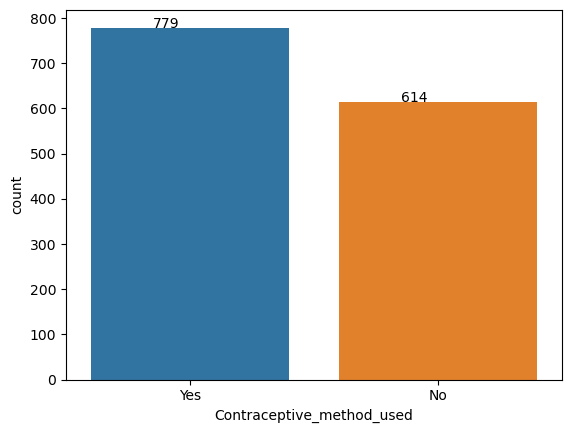

In [25]:
ax = sns.countplot(x="Contraceptive_method_used", data=df,  order = df['Contraceptive_method_used'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

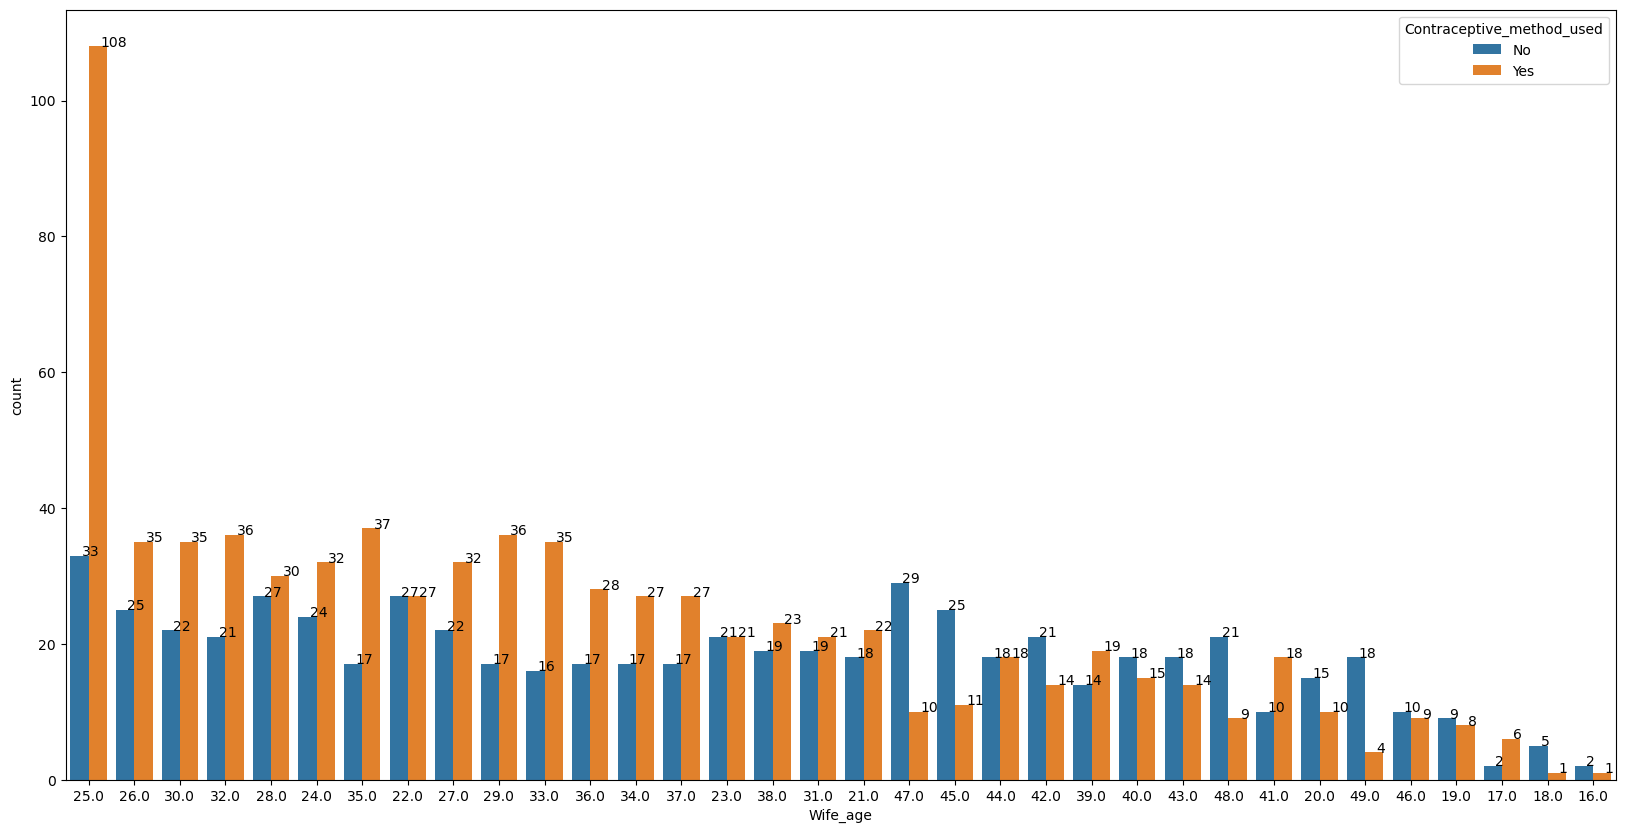

In [26]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Wife_age", data=df,hue='Contraceptive_method_used' , order = df['Wife_age'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
#plt.figure(figsize=(10,10))
plt.show()

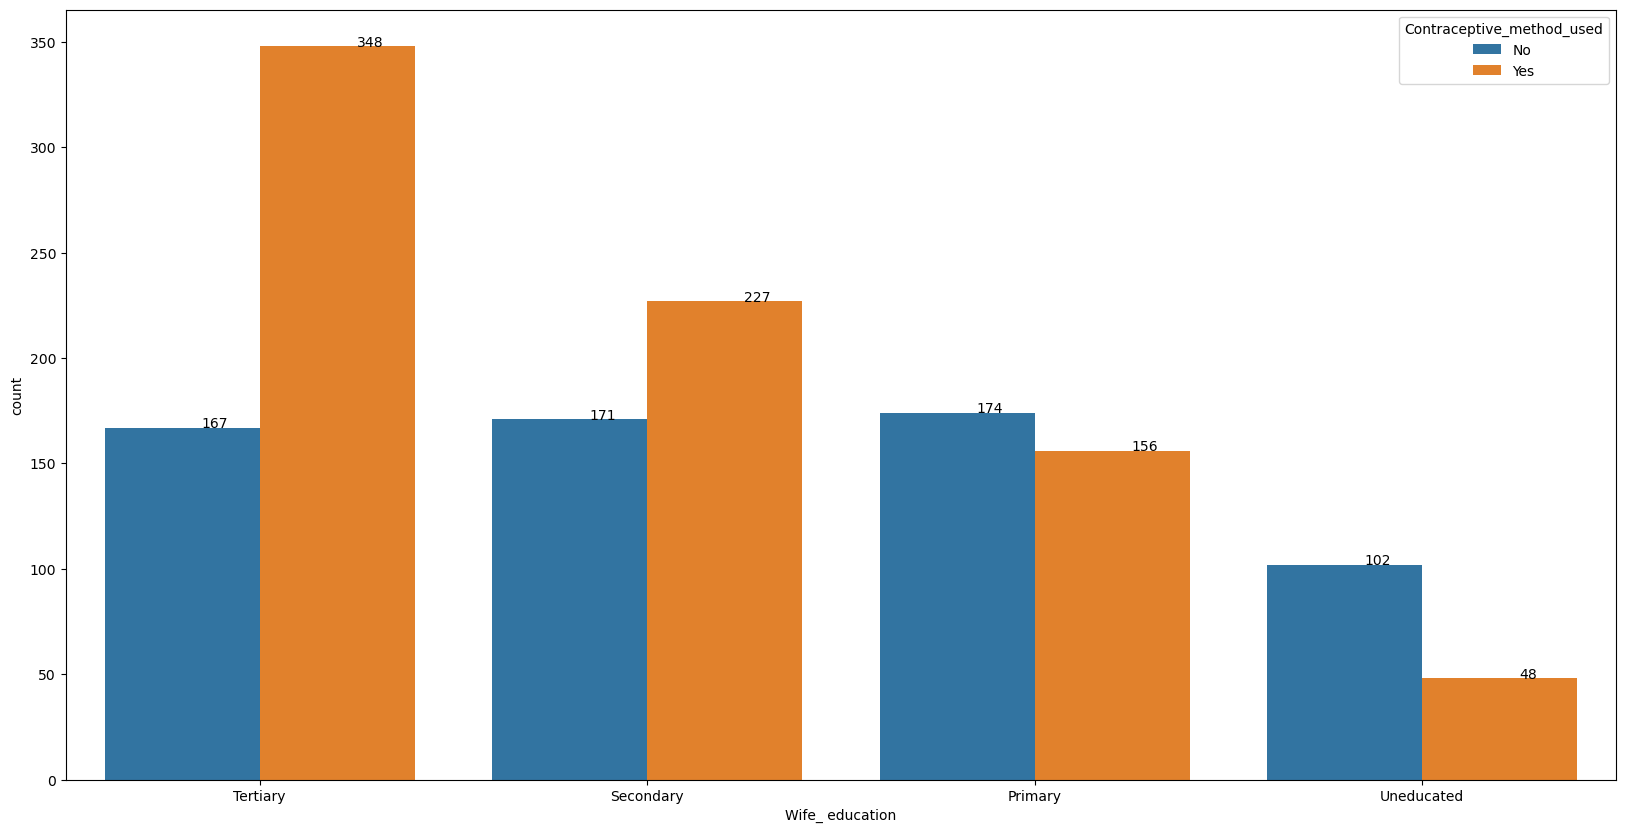

In [27]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Wife_ education", data=df,hue='Contraceptive_method_used' , order = df['Wife_ education'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
#plt.figure(figsize=(10,10))
plt.show()

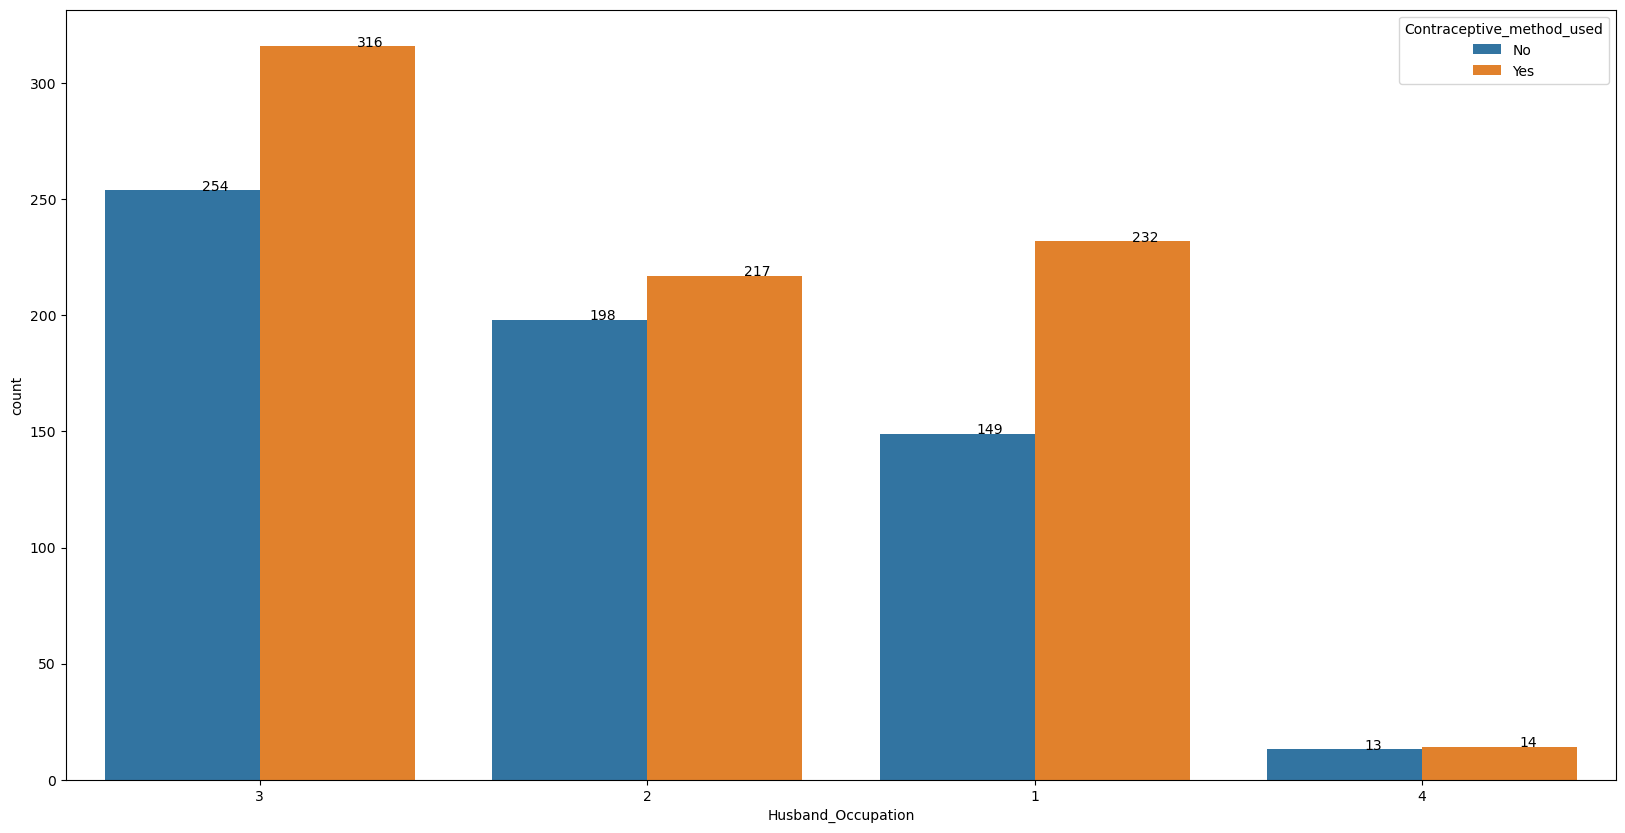

In [28]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Husband_Occupation", data=df,hue='Contraceptive_method_used' , order = df['Husband_Occupation'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
#plt.figure(figsize=(10,10))
plt.show()

In [29]:
df['Contraceptive_method_used']=np.where(df['Contraceptive_method_used']=='Yes','0',df['Contraceptive_method_used'])
df['Contraceptive_method_used']=np.where(df['Contraceptive_method_used']=='No','1',df['Contraceptive_method_used'])
    

In [30]:
df['Contraceptive_method_used']=df['Contraceptive_method_used'].astype(int)

In [31]:
df_dummy=pd.get_dummies(df,drop_first=True)

In [32]:
df_dummy.head()

,Wife_age,No_of_children_born,Husband_Occupation,Contraceptive_method_used,Wife_ education_Secondary,Wife_ education_Tertiary,Wife_ education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,Wife_religion_Scientology,Wife_Working_Yes,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure _Not-Exposed
0,24.0,3.0,2,1,0,0,0,1,0,0,1,0,0,0,0,0
1,45.0,10.0,3,1,0,0,1,1,0,0,1,0,0,1,0,0
2,43.0,7.0,3,1,0,0,0,1,0,0,1,0,0,1,0,0
3,42.0,9.0,3,1,1,0,0,0,0,0,1,0,0,0,0,0
4,36.0,8.0,3,1,1,0,0,1,0,0,1,0,1,0,0,0


In [33]:
X = df_dummy.drop('Contraceptive_method_used',axis=1)
Y = df_dummy.pop('Contraceptive_method_used')

In [34]:
X.head()

,Wife_age,No_of_children_born,Husband_Occupation,Wife_ education_Secondary,Wife_ education_Tertiary,Wife_ education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,Wife_religion_Scientology,Wife_Working_Yes,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure _Not-Exposed
0,24.0,3.0,2,0,0,0,1,0,0,1,0,0,0,0,0
1,45.0,10.0,3,0,0,1,1,0,0,1,0,0,1,0,0
2,43.0,7.0,3,0,0,0,1,0,0,1,0,0,1,0,0
3,42.0,9.0,3,1,0,0,0,0,0,1,0,0,0,0,0
4,36.0,8.0,3,1,0,0,1,0,0,1,0,1,0,0,0


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=.30, random_state=1,stratify=Y)

In [36]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',8083+3465)

X_train (975, 15)
X_test (418, 15)
train_labels (975,)
test_labels (418,)
Total Obs 11548


In [37]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [38]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=1)

In [39]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [40]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


In [41]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                                         Imp
Wife_age                            0.328290
No_of_children_born                 0.235708
Husband_Occupation                  0.090380
Standard_of_living_index_Very High  0.053203
Wife_ education_Tertiary            0.044708
Wife_Working_Yes                    0.039361
Wife_ education_Secondary           0.036602
Standard_of_living_index_Low        0.029683
Media_exposure _Not-Exposed         0.025431
Standard_of_living_index_Very Low   0.024802
Husband_education_Secondary         0.024635
Husband_education_Tertiary          0.023536
Wife_ education_Uneducated          0.015605
Husband_education_Uneducated        0.015338
Wife_religion_Scientology           0.012717


In [42]:
y_predict = dt_model.predict(X_test)

In [43]:
y_predict.shape

(418,)

In [44]:
dt_model.score(X_train,train_labels)

0.9805128205128205

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': [ 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)


In [46]:
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, train_labels)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001], 'criterion': ['gini'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [47]:
gdpd=pd.DataFrame(grid_search.cv_results_)

In [48]:
gdpd

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008686,0.002173,0.005422,0.001070,0.1,gini,1,sqrt,1,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",0.558974,0.558974,0.558974,0.558974,0.558974,0.558974,0.000000,101
1,0.008239,0.001115,0.005177,0.000416,0.1,gini,1,sqrt,5,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",0.558974,0.558974,0.558974,0.558974,0.558974,0.558974,0.000000,101
2,0.007731,0.000388,0.004964,0.000019,0.1,gini,1,sqrt,10,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",0.558974,0.558974,0.558974,0.558974,0.558974,0.558974,0.000000,101
3,0.007683,0.000398,0.005385,0.000490,0.1,gini,1,sqrt,15,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",0.558974,0.558974,0.558974,0.558974,0.558974,0.558974,0.000000,101
4,0.007894,0.000611,0.004799,0.000410,0.1,gini,1,sqrt,20,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",0.558974,0.558974,0.558974,0.558974,0.558974,0.558974,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.010576,0.000602,0.004798,0.000408,0.001,gini,20,log2,1,"{'ccp_alpha': 0.001, 'criterion': 'gini', 'max...",0.620513,0.692308,0.656410,0.630769,0.620513,0.644103,0.027444,39
146,0.009253,0.000551,0.005411,0.000468,0.001,gini,20,log2,5,"{'ccp_alpha': 0.001, 'criterion': 'gini', 'max...",0.615385,0.682051,0.646154,0.723077,0.712821,0.675897,0.040432,1
147,0.008983,0.000015,0.004488,0.000434,0.001,gini,20,log2,10,"{'ccp_alpha': 0.001, 'criterion': 'gini', 'max...",0.656410,0.702564,0.661538,0.646154,0.671795,0.667692,0.019297,5
148,0.008159,0.000405,0.005366,0.000478,0.001,gini,20,log2,15,"{'ccp_alpha': 0.001, 'criterion': 'gini', 'max...",0.635897,0.671795,0.697436,0.676923,0.630769,0.662564,0.025414,25


In [49]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=20, max_features='sqrt',
                       min_samples_leaf=5, random_state=1024)

In [50]:
reg_dt_model = grid_search.best_estimator_

In [51]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [52]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                         Imp
No_of_children_born                 0.555288
Wife_age                            0.126381
Standard_of_living_index_Very Low   0.100350
Wife_ education_Uneducated          0.091081
Husband_education_Tertiary          0.056894
Wife_ education_Tertiary            0.029664
Media_exposure _Not-Exposed         0.019303
Husband_Occupation                  0.014383
Standard_of_living_index_Very High  0.004839
Wife_religion_Scientology           0.001284
Standard_of_living_index_Low        0.000534
Wife_ education_Secondary           0.000000
Husband_education_Secondary         0.000000
Husband_education_Uneducated        0.000000
Wife_Working_Yes                    0.000000


In [53]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [54]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (975,)
ytest_predict (418,)


In [55]:
ytrain_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [56]:
ytest_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,

In [57]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.79375   , 0.20625   ],
       [0.61578947, 0.38421053],
       [0.79375   , 0.20625   ],
       [0.62790698, 0.37209302],
       [0.16666667, 0.83333333],
       [0.62790698, 0.37209302],
       [0.4       , 0.6       ],
       [0.62790698, 0.37209302],
       [0.66197183, 0.33802817],
       [0.01612903, 0.98387097],
       [0.4025974 , 0.5974026 ],
       [0.2       , 0.8       ],
       [0.61578947, 0.38421053],
       [0.79375   , 0.20625   ],
       [0.62790698, 0.37209302],
       [0.61578947, 0.38421053],
       [0.79375   , 0.20625   ],
       [0.79375   , 0.20625   ],
       [0.79375   , 0.20625   ],
       [0.62790698, 0.37209302],
       [0.62790698, 0.37209302],
       [0.875     , 0.125     ],
       [0.79375   , 0.20625   ],
       [0.7826087 , 0.2173913 ],
       [0.61578947, 0.38421053],
       [0.7826087 , 0.2173913 ],
       [0.79375   , 0.20625   ],
       [0.61578947, 0.38421053],
       [0.16666667, 0.83333333],
       [0.61578947, 0.38421053],
       [0.

In [58]:
test_labels

749     0
748     0
782     0
1357    0
1175    1
       ..
1236    0
425     0
857     0
235     1
174     1
Name: Contraceptive_method_used, Length: 418, dtype: int32

In [59]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.793750,0.206250
1,0.615789,0.384211
2,0.793750,0.206250
3,0.627907,0.372093
4,0.166667,0.833333


In [60]:
import matplotlib.pyplot as plt

AUC: 0.746


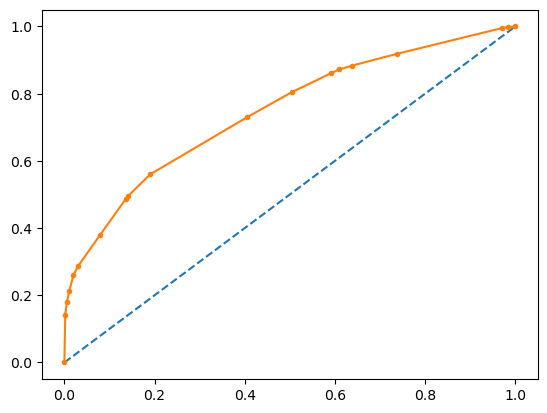

In [61]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fprtrain, tprtrain, thresholdstrain = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fprtrain, tprtrain, marker='.')
# show the plot
plt.show()

In [62]:
thresholdstrain

array([1.98387097, 0.98387097, 0.88888889, 0.83333333, 0.8       ,
       0.66666667, 0.6       , 0.5974026 , 0.57142857, 0.50909091,
       0.38421053, 0.37209302, 0.33802817, 0.33333333, 0.23809524,
       0.2173913 , 0.20625   , 0.125     , 0.1       ])

In [63]:
tprtrain

array([0.        , 0.14186047, 0.17906977, 0.21395349, 0.26046512,
       0.28837209, 0.37906977, 0.48604651, 0.49534884, 0.56046512,
       0.73023256, 0.80465116, 0.86046512, 0.87209302, 0.88372093,
       0.91860465, 0.99534884, 0.99767442, 1.        ])

In [64]:
fprtrain

array([0.        , 0.00183486, 0.00550459, 0.01100917, 0.02018349,
       0.03119266, 0.07889908, 0.13577982, 0.1412844 , 0.19082569,
       0.40550459, 0.50458716, 0.59082569, 0.60917431, 0.63853211,
       0.73761468, 0.9706422 , 0.98348624, 1.        ])

AUC: 0.677


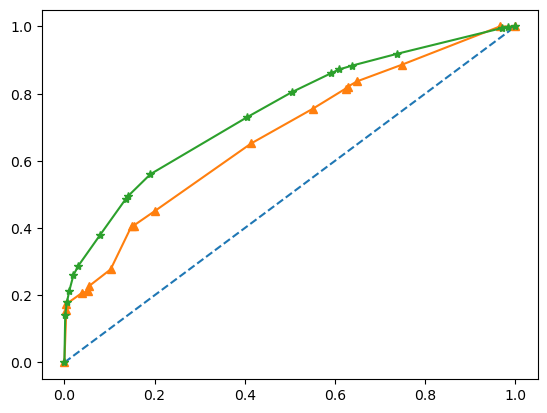

In [65]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fprtest, tprtest, thresholdstest = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fprtest, tprtest, marker="^") # Test 
plt.plot(fprtrain,tprtrain,marker="*") # Train
# show the plot
plt.show()

In [66]:
thresholdstest

array([1.98387097, 0.98387097, 0.88888889, 0.83333333, 0.8       ,
       0.66666667, 0.6       , 0.5974026 , 0.57142857, 0.50909091,
       0.38421053, 0.37209302, 0.33802817, 0.33333333, 0.23809524,
       0.2173913 , 0.20625   , 0.1       ])

In [67]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

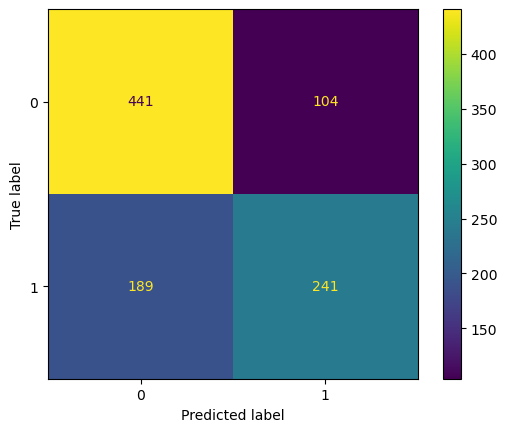

In [68]:
#Train confusion matrix
disp=ConfusionMatrixDisplay(confusion_matrix(train_labels,ytrain_predict),display_labels=None);
disp.plot();

In [69]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.6994871794871795

In [70]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       545
           1       0.70      0.56      0.62       430

    accuracy                           0.70       975
   macro avg       0.70      0.68      0.69       975
weighted avg       0.70      0.70      0.69       975



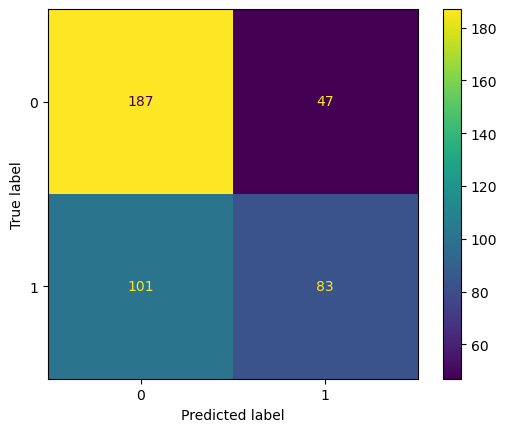

In [71]:
#Test Confusion matrix
disp=ConfusionMatrixDisplay(confusion_matrix(test_labels,ytest_predict),display_labels=None);
disp.plot();

In [72]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.645933014354067

In [73]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       234
           1       0.64      0.45      0.53       184

    accuracy                           0.65       418
   macro avg       0.64      0.63      0.62       418
weighted avg       0.64      0.65      0.63       418



In [74]:
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz

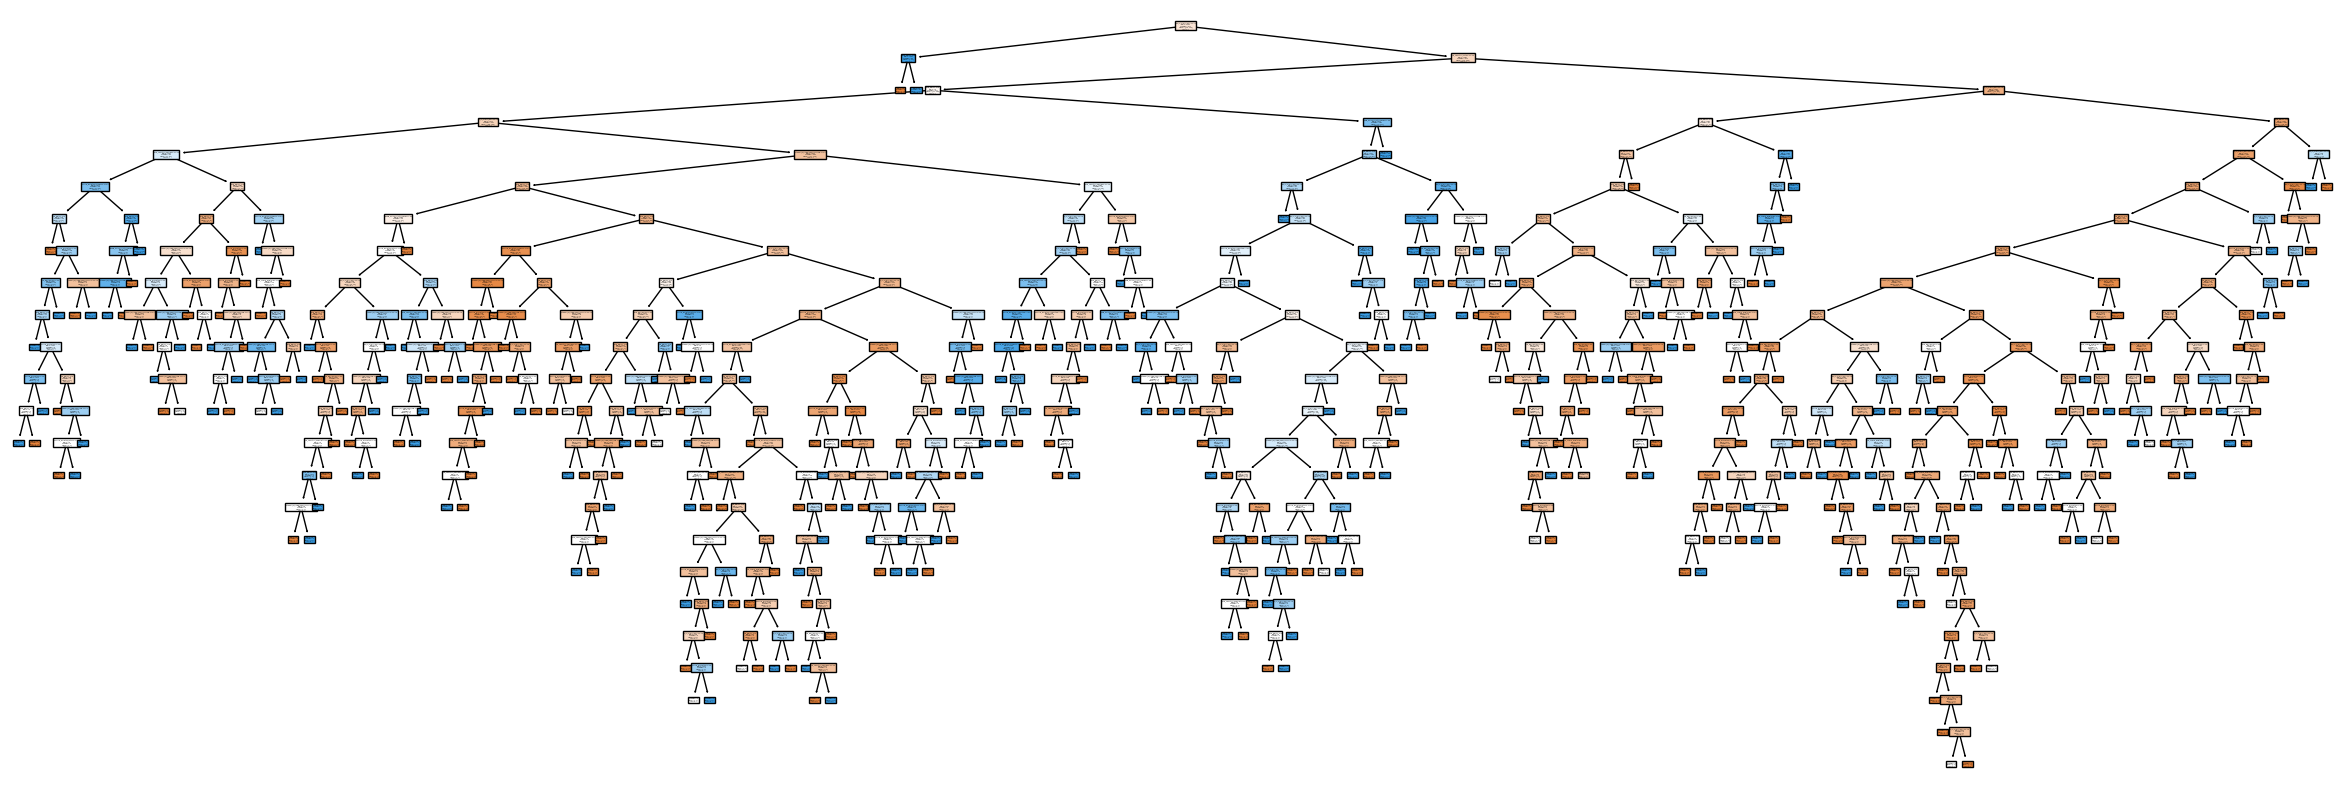

In [75]:
fig = plt.figure(figsize=(30,10))
_ = plot_tree(dt_model, 
                   feature_names=X_train.columns.to_list(),  
                   class_names=["0","1"],
                   filled=True)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt



In [77]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)



In [78]:
# Fit logistic regression model
lr = LogisticRegression(solver="liblinear")
lr.fit(X_train, y_train)



LogisticRegression(solver='liblinear')

In [79]:
# Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)



LinearDiscriminantAnalysis()

In [80]:
# Fit CART model
cart = DecisionTreeClassifier(random_state=1)
cart.fit(X_train, y_train)



DecisionTreeClassifier(random_state=1)

In [83]:
 #Import the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Make predictions
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)
y_train_pred_lda = lda.predict(X_train)
y_test_pred_lda = lda.predict(X_test)
y_train_pred_cart = cart.predict(X_train)
y_test_pred_cart = cart.predict(X_test)

In [84]:
# Evaluate the models
print("Logistic Regression Train Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("LDA Train Accuracy:", accuracy_score(y_train, y_train_pred_lda))
print("LDA Test Accuracy:", accuracy_score(y_test, y_test_pred_lda))
print("CART Train Accuracy:", accuracy_score(y_train, y_train_pred_cart))
print("CART Test Accuracy:", accuracy_score(y_test, y_test_pred_cart))

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lr))
print("\nLDA Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lda))
print("\nCART Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_cart))



Logistic Regression Train Accuracy: 0.6933333333333334
Logistic Regression Test Accuracy: 0.6244019138755981
LDA Train Accuracy: 0.6871794871794872
LDA Test Accuracy: 0.631578947368421
CART Train Accuracy: 0.9846153846153847
CART Test Accuracy: 0.5813397129186603

Logistic Regression Confusion Matrix:
[[175  51]
 [106  86]]

LDA Confusion Matrix:
[[179  47]
 [107  85]]

CART Confusion Matrix:
[[143  83]
 [ 92 100]]


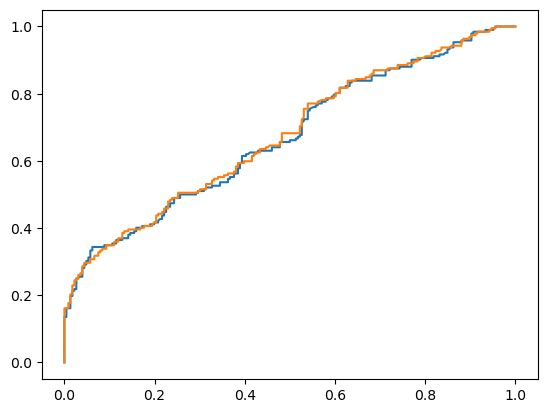

In [85]:
# Plot ROC curves and get ROC AUC scores
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda.predict_proba(X_test)[:,1])
fpr_cart, tpr_cart, _ = roc_curve(y_test, cart.predict_proba(X_test)[:,1])

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_lda, tpr_lda)

 



In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt



In [98]:
# Make predictions on training and testing sets
lr_train_preds = lr.predict(X_train)
lr_test_preds = lr.predict(X_test)
lda_train_preds = lda.predict(X_train)
lda_test_preds = lda.predict(X_test)
cart_train_preds = cart.predict(X_train)
cart_test_preds = cart.predict(X_test)



In [108]:
# Evaluate performance of models
models = [("Logistic Regression", lr_train_preds, lr_test_preds), 
         ("LDA", lda_train_preds, lda_test_preds), 
         ("CART", cart_train_preds, cart_test_preds)]

for model in models:
   name, train_preds, test_preds = model
   train_acc = accuracy_score(y_train, train_preds)
   test_acc = accuracy_score(y_test, test_preds)
   train_cm = confusion_matrix(y_train, train_preds)
   test_cm = confusion_matrix(y_test, test_preds)
   train_roc_auc = roc_auc_score(y_train, train_preds)
   test_roc_auc = roc_auc_score(y_test, test_preds)
   print(f"Model: {name}")

Model: Logistic Regression
Model: LDA
Model: CART
